
# Assignment: Unsupervised Machine Learning \ Genetic Algorithms

In this assignment you will experience with Genetic Algorithms (GAs), starting from a basic implementation, continuing with dedicated improvements, and later applying it in various unsupervised machine learning scenarios.

## Part 1: Time Series of 'Likes' Influenced by Personalization

Various personalization algorithms are applied in e-commerce and other kinds of websites/apps in order to increase purchases or user engagement.

The following time series were collected over a period of 20 months from a large online retail store. In this study, during the first 10 months (normalized as the period from month -10 to month 0) a contextual personalization algorithm was applied in order to increase user engagement (measured as the accumulated number of 'Likes' on products shared via Facebook). As in the case with many contextual approaches, this algorithm suffered from the 'filter bubble' problem (https://en.wikipedia.org/wiki/Filter_bubble), and therefore reached a plateau quite quickly.

Nonetheless, this step enabled a more advanced collaborative filtering algorithm to analyze the collected data, learn, and increase user engagement once it was applied in the following 10 months. A classic inflection point was detected after the transition to the new algorithm. A domain expert envisioned the inflection dynamics will behave similarly to the formula f(x) = ax^3 + bx^2 + cx + d. The values of a, b, c and d were found to be 4.8, 12.1, 53.2 and 6219, respectively.

<< Please note: This function is an analytical solution, used here for simplifying the actual study, where a dynamic model was created with ODEs >>

We are given a sample sparse data of users from 10 different European countries. In this project, we will implement a simple GA in order to fit our data to the above-mentioned function, and discover the parameters for a, b, c and d. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read measured data from an Excel file

In [4]:
xlsx = pd.ExcelFile('European Measurements.xlsx')
sheet1 = xlsx.parse(3) # Note the other datasets in the file.
variables = ["Month","Avg. Likes"]
data = sheet1.loc[:, variables].values
print(data)

[[-9.70000000e+00  1.93303385e+03]
 [-9.10000000e+00  3.07678202e+03]
 [-7.70000000e+00  4.61959427e+03]
 [-7.30000000e+00  4.87640388e+03]
 [-7.20000000e+00  5.27621777e+03]
 [-6.20000000e+00  5.76967851e+03]
 [-4.70000000e+00  5.26728526e+03]
 [-4.10000000e+00  6.40777934e+03]
 [-3.30000000e+00  6.05631612e+03]
 [-2.70000000e+00  6.10216500e+03]
 [-2.50000000e+00  5.18359545e+03]
 [-2.30000000e+00  7.03041233e+03]
 [-1.90000000e+00  5.69790109e+03]
 [-1.80000000e+00  5.42920417e+03]
 [-1.20000000e+00  5.23662184e+03]
 [-9.00000000e-01  6.28278124e+03]
 [-1.00000000e-01  6.53285159e+03]
 [ 2.00000000e-01  5.78284515e+03]
 [ 3.00000000e-01  6.57445814e+03]
 [ 4.00000000e-01  5.25761264e+03]
 [ 1.10000000e+00  5.86568880e+03]
 [ 1.50000000e+00  6.92127198e+03]
 [ 1.60000000e+00  6.15982519e+03]
 [ 2.10000000e+00  6.87265063e+03]
 [ 2.20000000e+00  5.57408399e+03]
 [ 2.50000000e+00  5.88485867e+03]
 [ 5.20000000e+00  6.75130936e+03]
 [ 5.40000000e+00  7.32399792e+03]
 [ 5.90000000e+00  7

### Simple GA mechanism

In [5]:
def fitness_function(data, pop):
    fitness = []
    for solution in range(len(pop)):
        error = 0;
        for event in range(len(data)):
            
            event_time = data[event][0]
            event_measured = data[event][1]
            event_expected = pop[solution][0]*event_time**3 + pop[solution][1]*event_time**2 + pop[solution][2]*event_time + pop[solution][3]
            error +=(event_expected - event_measured)**2
        fitness.append(1/error) # We use 1/error in order to use a maximization mechanism, while we want to minimize the error
    return fitness

def biased_selection(pop, fitness, num_parents):
    sorted_fitness_args = np.argsort(fitness)
    return pop[sorted_fitness_args[-num_parents:],:]
    # parents = np.empty((num_parents, pop.shape[1]))
    # for parent_num in range(num_parents):
    #     max_fitness_idx = np.where(fitness == np.max(fitness))
    #     max_fitness_idx = max_fitness_idx[0][0]
    #     parents[parent_num, :] = pop[max_fitness_idx, :]
    #     fitness[max_fitness_idx] = -99999999999
    # return parents

def recombination(parents, offspring_size):
    offspring = np.empty(offspring_size)
    recombination_point = np.uint8(offspring_size[1]/2)
    for k in range(offspring_size[0]):
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]
        offspring[k, 0:recombination_point] = parents[parent1_idx, 0:recombination_point]
        offspring[k, recombination_point:] = parents[parent2_idx, recombination_point:]
    return offspring

def mutation(offspring_recombination):
    for idx in range(offspring_recombination.shape[0]):
        random_value = np.random.randint(-100, 100, 1)
        random_index = np.random.randint(0,offspring_recombination.shape[1],1)
        offspring_recombination[idx, random_index] = offspring_recombination[idx, random_index] + random_value
    return offspring_recombination


### GA application for fitting time series data

The population of the first generation: 
[[8542 2624 6054 3080]
 [9995 8978 7432 4002]
 [7972 2798 3532 9720]
 ...
 [5440 4092  342 2703]
 [5371 9953 2377 2788]
 [5807 1981 6006 9619]]

Evolution:
Generation =  0 	Best fitness =  113954076274.86961
Generation =  1 	Best fitness =  113954076274.86961
Generation =  2 	Best fitness =  48097400337.74246
Generation =  3 	Best fitness =  28107556840.38044
Generation =  4 	Best fitness =  28107556840.38044
Generation =  5 	Best fitness =  24967979024.80034
Generation =  6 	Best fitness =  24967979024.80034
Generation =  7 	Best fitness =  24967979024.80034
Generation =  8 	Best fitness =  22601703471.39667
Generation =  9 	Best fitness =  16430468296.55635
Generation =  10 	Best fitness =  13743192164.08712
Generation =  11 	Best fitness =  12295650162.12129
Generation =  12 	Best fitness =  12295650162.12129
Generation =  13 	Best fitness =  7976455556.26478
Generation =  14 	Best fitness =  7873596910.13053
Generation =  15 	Best fitness = 

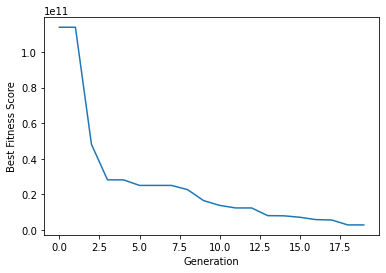

In [6]:
# GA Parameters
formula_degree = 4
number_of_solutions = 500
number_of_parents = 250
population_size = (number_of_solutions,formula_degree) 
number_of_generations = 20
best_outputs = []

# Genesis
new_population = np.random.randint(low=0, high=10000, size=population_size)
print("The population of the first generation: ")
print(new_population)

# Evolution
print ("\nEvolution:")
for generation in range(number_of_generations):

    fitness = fitness_function(data, new_population)
    print("Generation = ", generation, "\tBest fitness = ", round(1/np.max(fitness),5))
    # best_outputs.append(np.max(np.sum(new_population*formula_degree, axis=1)))
    best_outputs.append(round(1/np.max(fitness),5))
    parents = biased_selection(new_population, fitness, number_of_parents)
    offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
    offspring_mutation = mutation(offspring_recombination)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Results
print("\nThe population of the last generation: ")
print(new_population)
fitness = fitness_function(data, new_population)
best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution: ", new_population[best_match_idx, :])

# Chart
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.show()

## Challenge 231
Implement a new and improved GA, based on the one above, by taking the following actions:

1. Make the bias_selection function give more chances to solutions with better fitness values, but not necesseraly take the best ones, as currently done.
2. Make the recombination function make real random recombination along the chromosome and between chromosomes
3. Change the mutation rate and/or scale to better avoid local minima while keeping evolution time short
4. Apply a smarter stopping criterion
5. Consider different GA parameters in order to reach better results

In [455]:
# Your code here

# Make the bias_selection function give more chances to solutions with better fitness values,
# but not necesseraly take the best ones, as currently done.
def biased_selection_by_probs(pop, fitness, num_parents):
    sorted_fitness_args = np.argsort(fitness)
    fitness_norm = fitness / np.sum(fitness)
    parents = np.random.choice(pop.shape[0], num_parents, p=fitness_norm,replace=True)
    return pop[parents,:]

# Make the recombination function make real random recombination along the chromosome and between chromosomes
def recombination_random(parents, offspring_size):
    offspring = np.empty(offspring_size)
    
    for k in range(offspring_size[0]):
        parent1_idx, parent2_idx = np.random.choice(parents.shape[0],size=2,replace=False)
        recomb2 = np.random.choice(offspring_size[1],int(round(offspring_size[1]/2)))
        offspring[k, :] = parents[parent1_idx, :]
        offspring[k, recomb2] = parents[parent2_idx, recomb2]
    
    return offspring

# Change the mutation rate and scale to better avoid local minima while keeping evolution time short
def mutation_rated_scaled(offspring_recombination,rate):
    num_mut = int(round(rate * offspring_recombination.shape[0] * offspring_recombination.shape[1],0))
    
    for i in range(num_mut):
        row = np.random.randint(0,offspring_recombination.shape[0],1)
        col = np.random.randint(0,offspring_recombination.shape[1],1)
        offspring_recombination[row, col] = np.random.randint(1, offspring_recombination[row, col] * 2, 1)
        
    return offspring_recombination

The population of the first generation: 
[[1289 7293 1344 7291]
 [9372 4829 1520 9224]
 [9289 6400 5648 4452]
 ...
 [3365 6748 1394 9484]
 [1278   43 9200 9200]
 [5862 5905   41 5252]]

Evolution:
Generation =  0 	Best fitness =  67947429666.84375
Generation =  1 	Best fitness =  12682468067.90418
Generation =  2 	Best fitness =  1235881836.7913
Generation =  3 	Best fitness =  286929054.96961
Generation =  4 	Best fitness =  152451195.1515
Generation =  5 	Best fitness =  135347390.18411
Generation =  6 	Best fitness =  124407631.08903
Generation =  7 	Best fitness =  23583677.09758
Generation =  8 	Best fitness =  20005428.51816
Generation =  9 	Best fitness =  13107596.6252
Generation =  10 	Best fitness =  10949950.76172
Generation =  11 	Best fitness =  9900240.41971
Generation =  12 	Best fitness =  9900240.41971
Generation =  13 	Best fitness =  9900240.41971
Generation =  14 	Best fitness =  9817578.39148
Generation =  15 	Best fitness =  9817578.39148
Generation =  16 	Best fi

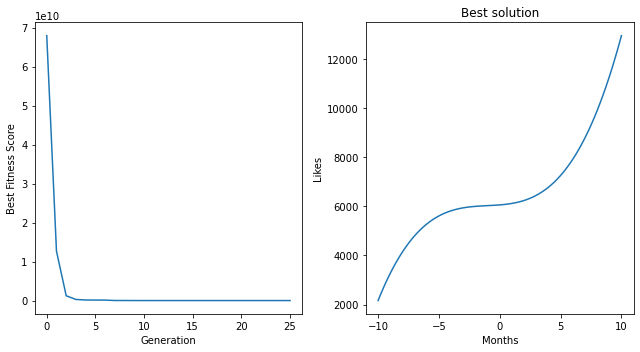

In [469]:
np.random.seed(10)

# GA Parameters
formula_degree = 4

# Consider different GA parameters in order to reach better results
number_of_solutions = 5000
number_of_parents = 3000

population_size = (number_of_solutions,formula_degree) 
best_outputs = []
prev_fitness = np.inf
delta = 0.1
generation = 0
mutation_rate = 0.1
low_val = 0
high_val = 10000
conv_count = 0

# Genesis
new_population = np.random.randint(low=low_val, high=high_val, size=population_size)
print("The population of the first generation: ")
print(new_population)

# Evolution
print ("\nEvolution:")

# Apply a smarter stopping criterion
while True:
    fitness = fitness_function(data, new_population)
    best_fitness = round(1/np.max(fitness),5)
    
    if prev_fitness - best_fitness <= delta: # and prev_fitness - best_fitness >= 0:
        if conv_count == 3:
            break
        
        else:
            conv_count += 1
            
    else:
        conv_count = 0
        
    prev_fitness = best_fitness
    print("Generation = ", generation, "\tBest fitness = ",best_fitness)
    best_outputs.append(round(1/np.max(fitness),5))
    parents = biased_selection_by_probs(new_population, fitness, number_of_parents)
    offspring_recombination = recombination_random(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
    offspring_mutation = mutation_rated_scaled(offspring_recombination,mutation_rate)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    generation = generation + 1
    
# Results
print("\nThe population of the last generation: ")
print(new_population)
fitness = fitness_function(data, new_population)
best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution: ", new_population[best_match_idx, :])

# Chart
plt.figure(figsize = (9,5))
plt.subplot(1,2,1)
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")

plt.subplot(1,2,2)
a,b,c,d = new_population[best_match_idx, :].flatten()
x = np.linspace(-10,10,100)
plt.plot(x, a * x**3 + b * x**2 + c * x + d)
plt.xlabel('Months')
plt.ylabel('Likes')
plt.title('Best solution')
plt.tight_layout()

## Part 2: Solving Different Problems With the Same GA

Below is a reminder of the K-Means algorithm you implemented in Assignment 21X.

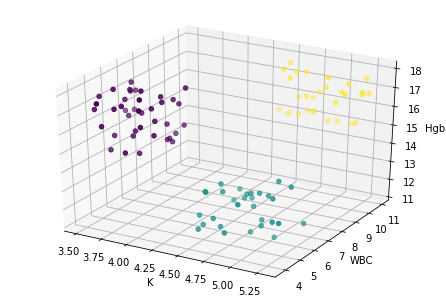

In [457]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

xlsx = pd.ExcelFile('EMR-Blood.xlsx')
sheet1 = xlsx.parse(0)
sheet1.set_index("Key", inplace=True)

variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

y_pred_KMeans1 = KMeans(n_clusters=3).fit_predict(EMR3d1)

def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1)

### Challenge 232
Solve the same clustering problem with a GA **without assuming K** (no iteration over differnet Ks), by trying to minimize the intra-cluster distances and maximize the inter-cluster distances.

**hint: You can build the population as the cluster assignment of each point or as cluster centers (consider coordinates boundaries)

In [458]:
from sklearn.metrics import calinski_harabasz_score

def fitness_calinski_harabasz(data, pop):
    fitness = []
    
    for solution in pop:
        calinski = calinski_harabasz_score(data, solution)
        fitness.append(calinski)
    
    return fitness

def mutation_classification(offspring_recombination,rate):
    num_mut = int(round(rate * offspring_recombination.shape[0] * offspring_recombination.shape[1],0))
    labels = np.unique(offspring_recombination)
    new_label = np.max(labels) + 1
    labels = np.append(labels,new_label)
    
    for i in range(num_mut):
        row = np.random.randint(0,offspring_recombination.shape[0],1)
        col = np.random.randint(0,offspring_recombination.shape[1],1)
        new_label = np.random.choice(labels)
        offspring_recombination[row, col] = new_label
    
    return offspring_recombination

The population of the first generation: 
[[1. 0. 0. ... 1. 1. 2.]
 [0. 1. 1. ... 2. 1. 2.]
 [2. 1. 2. ... 2. 1. 0.]
 ...
 [2. 1. 0. ... 1. 0. 0.]
 [3. 1. 3. ... 2. 4. 1.]
 [1. 0. 1. ... 0. 0. 2.]]

Evolution:
Generation =  10 	Best fitness =  8.210445392101487
Generation =  20 	Best fitness =  29.529275199783207
Generation =  30 	Best fitness =  74.36176935502047
Generation =  40 	Best fitness =  124.9497400974098
Generation =  50 	Best fitness =  164.15274683075074
Generation =  60 	Best fitness =  234.54427979973914
Generation =  70 	Best fitness =  246.39745022914707
Generation =  80 	Best fitness =  272.5987827090701

The population of the last generation: 
[[0. 1. 2. ... 1. 2. 2.]
 [0. 1. 2. ... 1. 2. 2.]
 [0. 1. 2. ... 1. 2. 2.]
 ...
 [0. 1. 2. ... 1. 2. 2.]
 [0. 1. 2. ... 1. 2. 2.]
 [0. 1. 2. ... 1. 2. 2.]]
Best solution:  [[[2. 1. 2. 0. 1. 2. 0. 1. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1. 2. 2. 0. 1. 2.
   0. 1. 2. 0. 1. 2. 2. 0. 1. 2. 0. 1. 2. 0. 1. 2. 2. 0. 1. 2. 0. 1. 2.
   0. 1. 2. 2.

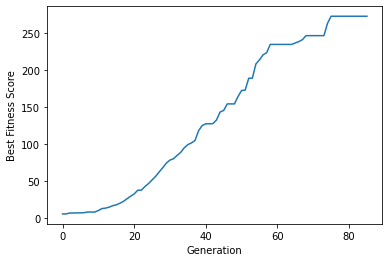

In [470]:
# Your code here

np.random.seed(10)

# GA Parameters
number_of_solutions = 300
number_of_parents = 100
point_num = EMR3d1.shape[0]
population_size = (number_of_solutions,point_num) 
best_outputs = []
prev_fitness = 0
delta = 0.01
generation = 1
mutation_rate = 0.04
conv_count = 0

# Genesis
new_population = np.zeros(population_size)

# for each solution we set a random clusters number
for i in range (number_of_solutions):
    num_k = np.random.randint(low=2,high=6)
    new_population[i] = np.random.randint(low=0, high=num_k, size=point_num)

print("The population of the first generation: ")
print(new_population)

# Evolution
print ("\nEvolution:")

# Apply a smarter stopping criterion
while True:
    fitness = fitness_calinski_harabasz(EMR3d1, new_population)
    best_fitness = np.max(fitness)
    avg_fitness = np.mean(fitness)
    
    if best_fitness - prev_fitness <= delta:
        if conv_count == 10:
            break
        
        else:
            conv_count += 1
            
    else:
        conv_count = 0
        
    prev_fitness = best_fitness
    
    if generation % 10 == 0:
        print("Generation = ", generation, "\tBest fitness = ",best_fitness)
    
    best_outputs.append(best_fitness)
    parents = biased_selection_by_probs(new_population, np.exp(fitness), number_of_parents)
    offspring_recombination = recombination_random(parents, offspring_size=(population_size[0]-parents.shape[0], point_num))
    offspring_mutation = mutation_classification(offspring_recombination,mutation_rate)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    generation = generation + 1
    
# Results
print("\nThe population of the last generation: ")
print(new_population)
fitness = fitness_function(data, new_population)
best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution: ", new_population[best_match_idx, :])

# Chart
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.show()

k = 3


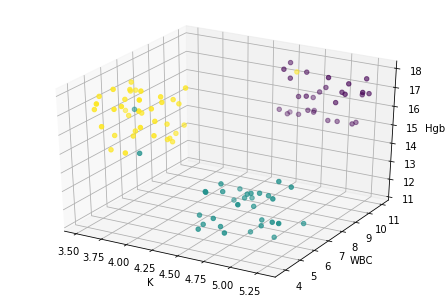

In [471]:
make_chart(EMR3d1, new_population[best_match_idx[0][0], :], variables1)
k = np.unique(new_population[best_match_idx[0][0], :]).size
print("k =", k)

## Challenge 233: Reconstruct Image (Bonus)
In this part you will attemp to generate an image which is closest to a target image given. 

First we will load the image from a file:


In [461]:
import matplotlib.image as mpimg

img=mpimg.imread('pexels-photo-57905.jpeg')

For simplicity (and running time), we focus on a small part of the image:

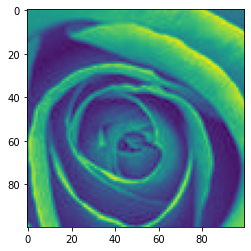

In [462]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(img[100:200,200:300,0])

And we will define this part as out target image to reconstruct:

In [463]:
target = img[100:200,200:300,0]

Your mission is to generate an image starting at random noise. The goal is to get an image as close as possible to the target. Don;t worry if it's still noisy...
FYI: GA are not the best solution for these types of problems ;)
You can use these blog posts to give you ideas:
https://towardsdatascience.com/genetic-algorithm-implementation-in-python-5ab67bb124a6

https://heartbeat.fritz.ai/reproducing-images-using-a-genetic-algorithm-with-python-91fc701ff84

In [464]:
# Your code here
import functools
import operator
import random

def img2chromosome(img_arr):
    chromosome = np.reshape(a=img_arr, newshape=(functools.reduce(operator.mul, img_arr.shape)))
    return chromosome

def chromosome2img(chromosome, img_shape):
    img_arr = np.reshape(a=chromosome, newshape=img_shape)
    return img_arr

def initial_population(img_shape, n_individuals=8):
    init_population = np.empty(shape=(n_individuals, functools.reduce(operator.mul, img_shape)), dtype=np.uint8)
    
    for indv_num in range(n_individuals):
        # Randomly generating initial population chromosomes genes values.
        init_population[indv_num, :] = np.random.random(functools.reduce(operator.mul, img_shape))*256
    
    return init_population

def fitness_fun(target_chrom, indiv_chrom):
    quality = np.mean(np.abs(target_chrom-indiv_chrom))
    quality = np.sum(target_chrom) - quality
    return quality

def cal_pop_fitness(target_chrom, pop):
    qualities = np.zeros(pop.shape[0])
    
    for indv_num in range(pop.shape[0]):
        qualities[indv_num] = fitness_fun(target_chrom, pop[indv_num, :])
    
    return qualities

def select_mating_pool(pop, qualities, num_parents):
    parents = np.empty((num_parents, pop.shape[1]), dtype=np.uint8)
    
    for parent_num in range(num_parents):
        max_qual_idx = np.where(qualities == np.max(qualities))
        max_qual_idx = max_qual_idx[0][0]
        parents[parent_num, :] = pop[max_qual_idx, :]
        qualities[max_qual_idx] = -1
    
    return parents

def crossover(parents, img_shape, n_individuals=8):
    new_population = np.empty(shape=(n_individuals, functools.reduce(operator.mul, img_shape)), dtype=np.uint8)
    
    #Previous parents (best elements).
    new_population[0:parents.shape[0], :] = parents
    
    # Getting how many offspring to be generated. If the population size is 8 and number of parents mating is 4,
    # then number of offspring to be generated is 4.
    num_newly_generated = n_individuals-parents.shape[0]
    
    # Getting all possible permutations of the selected parents.
    parents_permutations = list(itertools.permutations(iterable=np.arange(0, parents.shape[0]), r=2))
    
    # Randomly selecting the parents permutations to generate the offspring.
    selected_permutations = random.sample(range(len(parents_permutations)), num_newly_generated)
    comb_idx = parents.shape[0]
    
    for comb in range(len(selected_permutations)):
        
        # Generating the offspring using the permutations previously selected randmly.
        selected_comb_idx = selected_permutations[comb]
        selected_comb = parents_permutations[selected_comb_idx]
        
        # Applying crossover by exchanging half of the genes between two parents.
        half_size = np.int32(new_population.shape[1]/2)
        new_population[comb_idx+comb, 0:half_size] = parents[selected_comb[0], 
                                                             0:half_size]
        new_population[comb_idx+comb, half_size:] =  parents[selected_comb[1], 
                                                             half_size:]
    
    return new_population

def mutation(population, num_parents_mating, mut_percent):

    for idx in range(num_parents_mating, population.shape[0]):

        # A predefined percent of genes are selected randomly.
        rand_idx = np.uint32(np.random.random(size=np.uint32(mut_percent/100*population.shape[1]))*population.shape[1])

        # Changing the values of the selected genes randomly.
        new_values = np.uint8(np.random.random(size=rand_idx.shape[0])*256)

        # Updating population after mutation.
        population[idx, rand_idx] = new_values

    return population

In [474]:
import itertools

# Target image after enconding. Value encoding is used.
target_chromosome = img2chromosome(target)

# Population size
sol_per_pop = 8
# Mating pool size
num_parents_mating = 4
# Mutation percentage
mutation_percent = .01

num_possible_permutations = len(list(itertools.permutations(iterable=np.arange(0, num_parents_mating), r=2)))
num_required_permutations = sol_per_pop-num_possible_permutations

if(num_required_permutations>num_possible_permutations):
    print(
    "\n*Inconsistency in the selected populatiton size or number of parents.*"
    "\nImpossible to meet these criteria.\n"
    )
    sys.exit(1)

# Creating an initial population randomly.
new_population = initial_population(img_shape=target.shape, n_individuals=sol_per_pop)

for iteration in range(100000):
    # Measing the fitness of each chromosome in the population.
    qualities = cal_pop_fitness(target_chromosome, new_population)
    
    if iteration % 100 == 0:
        print('Quality : ', np.max(qualities), ', Iteration : ', iteration)
    
    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, qualities, num_parents_mating)
    
    # Generating next generation using crossover.
    new_population = crossover(parents, target.shape, n_individuals=sol_per_pop)


    new_population = mutation(population=new_population, num_parents_mating=num_parents_mating, mut_percent=mutation_percent)
    

Quality :  1026830.3134 , Iteration :  0
Quality :  1026832.1689 , Iteration :  100
Quality :  1026832.8883 , Iteration :  200
Quality :  1026833.6077 , Iteration :  300
Quality :  1026834.3424 , Iteration :  400
Quality :  1026835.1068 , Iteration :  500
Quality :  1026835.8192 , Iteration :  600
Quality :  1026836.5967 , Iteration :  700
Quality :  1026837.3145 , Iteration :  800
Quality :  1026837.9967 , Iteration :  900
Quality :  1026838.676 , Iteration :  1000
Quality :  1026839.3279 , Iteration :  1100
Quality :  1026839.9754 , Iteration :  1200
Quality :  1026840.6537 , Iteration :  1300
Quality :  1026841.3455 , Iteration :  1400
Quality :  1026842.1208 , Iteration :  1500
Quality :  1026842.8759 , Iteration :  1600
Quality :  1026843.5179 , Iteration :  1700
Quality :  1026844.2665 , Iteration :  1800
Quality :  1026844.8785 , Iteration :  1900
Quality :  1026845.4889 , Iteration :  2000
Quality :  1026846.0998 , Iteration :  2100
Quality :  1026846.7817 , Iteration :  2200
Q

Quality :  1026907.4019 , Iteration :  18500
Quality :  1026907.5486 , Iteration :  18600
Quality :  1026907.7183 , Iteration :  18700
Quality :  1026907.9085 , Iteration :  18800
Quality :  1026908.1108 , Iteration :  18900
Quality :  1026908.2886 , Iteration :  19000
Quality :  1026908.522 , Iteration :  19100
Quality :  1026908.6737 , Iteration :  19200
Quality :  1026908.8631 , Iteration :  19300
Quality :  1026909.0069 , Iteration :  19400
Quality :  1026909.1712 , Iteration :  19500
Quality :  1026909.3265 , Iteration :  19600
Quality :  1026909.4965 , Iteration :  19700
Quality :  1026909.6369 , Iteration :  19800
Quality :  1026909.8257 , Iteration :  19900
Quality :  1026909.9755 , Iteration :  20000
Quality :  1026910.149 , Iteration :  20100
Quality :  1026910.3247 , Iteration :  20200
Quality :  1026910.483 , Iteration :  20300
Quality :  1026910.6901 , Iteration :  20400
Quality :  1026910.8549 , Iteration :  20500
Quality :  1026910.9977 , Iteration :  20600
Quality :  10

Quality :  1026928.6141 , Iteration :  37100
Quality :  1026928.6711 , Iteration :  37200
Quality :  1026928.73 , Iteration :  37300
Quality :  1026928.7813 , Iteration :  37400
Quality :  1026928.8464 , Iteration :  37500
Quality :  1026928.9152 , Iteration :  37600
Quality :  1026928.9755 , Iteration :  37700
Quality :  1026929.0338 , Iteration :  37800
Quality :  1026929.0806 , Iteration :  37900
Quality :  1026929.1512 , Iteration :  38000
Quality :  1026929.2276 , Iteration :  38100
Quality :  1026929.2869 , Iteration :  38200
Quality :  1026929.352 , Iteration :  38300
Quality :  1026929.4253 , Iteration :  38400
Quality :  1026929.503 , Iteration :  38500
Quality :  1026929.5694 , Iteration :  38600
Quality :  1026929.6529 , Iteration :  38700
Quality :  1026929.7076 , Iteration :  38800
Quality :  1026929.785 , Iteration :  38900
Quality :  1026929.83 , Iteration :  39000
Quality :  1026929.892 , Iteration :  39100
Quality :  1026929.9492 , Iteration :  39200
Quality :  1026930

Quality :  1026937.5179 , Iteration :  55700
Quality :  1026937.5526 , Iteration :  55800
Quality :  1026937.5894 , Iteration :  55900
Quality :  1026937.6023 , Iteration :  56000
Quality :  1026937.6408 , Iteration :  56100
Quality :  1026937.6668 , Iteration :  56200
Quality :  1026937.689 , Iteration :  56300
Quality :  1026937.7208 , Iteration :  56400
Quality :  1026937.7556 , Iteration :  56500
Quality :  1026937.7857 , Iteration :  56600
Quality :  1026937.8112 , Iteration :  56700
Quality :  1026937.8575 , Iteration :  56800
Quality :  1026937.8964 , Iteration :  56900
Quality :  1026937.9327 , Iteration :  57000
Quality :  1026937.974 , Iteration :  57100
Quality :  1026938.0245 , Iteration :  57200
Quality :  1026938.0407 , Iteration :  57300
Quality :  1026938.0716 , Iteration :  57400
Quality :  1026938.0987 , Iteration :  57500
Quality :  1026938.1205 , Iteration :  57600
Quality :  1026938.1416 , Iteration :  57700
Quality :  1026938.1716 , Iteration :  57800
Quality :  1

Quality :  1026942.2518 , Iteration :  74300
Quality :  1026942.2726 , Iteration :  74400
Quality :  1026942.2889 , Iteration :  74500
Quality :  1026942.3007 , Iteration :  74600
Quality :  1026942.3337 , Iteration :  74700
Quality :  1026942.348 , Iteration :  74800
Quality :  1026942.3688 , Iteration :  74900
Quality :  1026942.3977 , Iteration :  75000
Quality :  1026942.4176 , Iteration :  75100
Quality :  1026942.4381 , Iteration :  75200
Quality :  1026942.4528 , Iteration :  75300
Quality :  1026942.4698 , Iteration :  75400
Quality :  1026942.4908 , Iteration :  75500
Quality :  1026942.5151 , Iteration :  75600
Quality :  1026942.5276 , Iteration :  75700
Quality :  1026942.5467 , Iteration :  75800
Quality :  1026942.5644 , Iteration :  75900
Quality :  1026942.5769 , Iteration :  76000
Quality :  1026942.5961 , Iteration :  76100
Quality :  1026942.6107 , Iteration :  76200
Quality :  1026942.6261 , Iteration :  76300
Quality :  1026942.6487 , Iteration :  76400
Quality :  

Quality :  1026945.1786 , Iteration :  92800
Quality :  1026945.1879 , Iteration :  92900
Quality :  1026945.1954 , Iteration :  93000
Quality :  1026945.2026 , Iteration :  93100
Quality :  1026945.2124 , Iteration :  93200
Quality :  1026945.2292 , Iteration :  93300
Quality :  1026945.2415 , Iteration :  93400
Quality :  1026945.2534 , Iteration :  93500
Quality :  1026945.2686 , Iteration :  93600
Quality :  1026945.2767 , Iteration :  93700
Quality :  1026945.2831 , Iteration :  93800
Quality :  1026945.2918 , Iteration :  93900
Quality :  1026945.3028 , Iteration :  94000
Quality :  1026945.3133 , Iteration :  94100
Quality :  1026945.3244 , Iteration :  94200
Quality :  1026945.3385 , Iteration :  94300
Quality :  1026945.3473 , Iteration :  94400
Quality :  1026945.3586 , Iteration :  94500
Quality :  1026945.3675 , Iteration :  94600
Quality :  1026945.3881 , Iteration :  94700
Quality :  1026945.4005 , Iteration :  94800
Quality :  1026945.4223 , Iteration :  94900
Quality : 

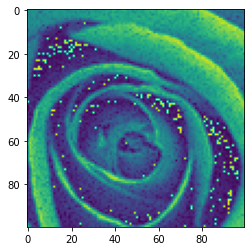

In [475]:
# plot the best image from the last generation

qualities = cal_pop_fitness(target_chromosome, new_population)
max_qual_idx = np.where(qualities == np.max(qualities))
max_qual_idx = max_qual_idx[0][0]
new_image = chromosome2img(new_population[max_qual_idx, :],(100,100))
imgplot = plt.imshow(new_image)